In [2]:
import numpy

def color_calc(frac):
    r,g,b=0.,0.,0.
    r=0.5*(-frac+1.)
    b=0.5*(1.+frac)
#     r=frac
#     b=1.-frac
    return r,g,b

def frac_calc(nmr,xrd):
    hypo=numpy.sqrt(nmr**2 + xrd**2) #Calculate "hypotenuse" to normalize fraction to -1<x<1
    frac=(nmr-xrd)/nmr
    return frac


file=open('input','r')
store=[]
for line in file:
    store.append(line)
file.close()

diag_peaks={}
for data in store:
    typ,ident,letter,nmr,xrd=data.split()[0],int(data.split()[1]),data.split()[2],float(data.split()[3]),float(data.split()[4])
    tag=typ+' '+str(ident)+' '+letter
    diag_peaks[tag]=(nmr,xrd)
    if(nmr!=0. and xrd!=0.):
        print tag,'\t',(nmr-xrd)/nmr

write=open('output','w')
file=open('1EZA.pdb')
atom_list=[]
for line in file:
    if(line[0:4]=='ATOM'):
        atom_number = line[6:12]
        atom_name = line[13:16]
        residue_name = line[17:20]
        residue_number = int(line[22:26].strip())
        x_coord = float(line[30:38])
        y_coord = float(line[38:46])
        z_coord = float(line[46:54])

        atom={}
        atom['num']=atom_number
        atom['ele']=atom_name
        atom['residue']=residue_name+' '+str(residue_number)
        atom['x'], atom['y'], atom['z']=x_coord,y_coord,z_coord
        atom_list.append(atom)
#Now iterate over all atoms in atom_list and group in residue (type & number):
residue_list=[]
for atom in atom_list:
    if((atom['residue']+' A') in residue_list):
        pass
    else:
        if((atom['residue'][0:3]=='LEU') or (atom['residue'][0:3]=='VAL')):
            residue_list.append(atom['residue']+' A')
            residue_list.append(atom['residue']+' B')
        else:
            residue_list.append(atom['residue']+' A')
compare_file=open('compare_file_2','w')
for residue in residue_list:
    i=int(residue.split()[1])
    r,g,b=0.2,0.2,0.2
    if(residue in diag_peaks):
        print 'ENTERED LOOP'
        r_a,g_a,b_a=0.2,0.2,0.2
        r_b,g_b,b_b=0.2,0.2,0.2
        resa,resb=residue[:-1]+'A',residue[:-1]+'B'
        try:
            nmr_a,xrd_a=diag_peaks[resa]
            r_a,g_a,b_a=color_calc(frac_calc(nmr_a,xrd_a))
            nmr_b,xrd_b=diag_peaks[resb]
            r_b,g_b,b_b=color_calc(frac_calc(nmr_b,xrd_b))
            r,g,b=(r_a+r_b)/2.,(g_a+g_b)/2.,(b_a+b_b)/2.
            write.write('set_color color%i = [%.2f,%.2f,%.2f]\n'%(i,r,g,b))
            write.write('color color%i, resi %i\n'%(i,i))
            compare_file.write('%i\t%.2f\n'%(i,(frac_calc(nmr_a,xrd_a)+frac_calc(nmr_b,xrd_b))/2.))
            print residue,resa,resb
            continue
        except:
            pass
        try:
            nmr_a,xrd_a=diag_peaks[resa]
            r_a,g_a,b_a=color_calc(frac_calc(nmr_a,xrd_a))
            r,g,b=r_a,g_a,b_a
            write.write('set_color color%i = [%.2f,%.2f,%.2f]\n'%(i,r,g,b))
            write.write('color color%i, resi %i\n'%(i,i))
            compare_file.write('%i\t%.2f\n'%(i,frac_calc(nmr_a,xrd_a)))
            print residue
            continue
        except:
            pass
        try:
            nmr_b,xrd_b=diag_peaks[resb]
            r_b,g_b,b_b=color_calc(frac_calc(nmr_b,xrd_b))
            r,g,b=r_b,g_b,b_b
            write.write('set_color color%i = [%.2f,%.2f,%.2f]\n'%(i,r,g,b))
            write.write('color color%i, resi %i\n'%(i,i))
            compare_file.write('%i\t%.2f\n'%(i,frac_calc(nmr_b,xrd_b)))
            print residue
            continue
        except:
            pass
    print residue,'WRITING GREY: '        
    write.write('set_color color%i = [%.2f,%.2f,%.2f]\n'%(i,r,g,b))
    write.write('color color%i, resi %i\n'%(i,i))
write.close()
compare_file.close()
    


ALA 169 A 	0.989053548763
ALA 194 A 	-5.26437208389
ILE 152 A 	-0.767370826836
ILE 108 A 	-1.07049418605
LEU 218 B 	0.437021552098
LEU 218 A 	0.635424056396
LEU 18 A 	0.107631216402
LEU 18 B 	-0.370246722239
LEU 149 B 	0.444812347708
LEU 149 A 	0.000685471554706
ILE 90 A 	-1.58266971159
ALA 241 A 	0.951743573443
VAL 235 B 	0.851327134806
VAL 235 A 	0.542689424727
LEU 118 A 	0.205547157832
LEU 118 B 	-0.098725688403
LEU 79 B 	0.470443138026
LEU 79 A 	0.0677097825348
LEU 44 B 	0.0748591353499
LEU 44 A 	0.959405909554
ALA 61 A 	0.987928693009
LEU 92 B 	-0.612156520283
LEU 92 A 	0.963247833245
ALA 127 A 	0.719569521802
VAL 159 B 	0.698034430858
VAL 208 B 	0.602743364378
VAL 208 A 	-0.413086504179
ALA 16 A 	0.841151831787
ALA 160 A 	0.723700525497
VAL 36 A 	0.875990181626
VAL 36 B 	0.873941938599
LEU 17 B 	-0.766833982839
ALA 71 A 	-0.436848434915
LEU 17 A 	0.217990064674
VAL 212 B 	0.954736409131
VAL 159 A 	0.924678178209
LEU 19 A 	0.803942440264
LEU 19 B 	-0.765583161177
VAL 40 B 	0.80801

In [17]:
# r_diff=r_auto-r_auto[numpy.diag_indices(self.num_methyls)]
arr_1=numpy.array([[15.,12.,12.],[10.,2.,15.],[19.,18.,35.]])
arr_2=numpy.array([[11.,12.,13.],[21.,22.,23.],[31.,32.,33.]])
arr_diff=numpy.transpose(numpy.transpose(arr_1)-arr_2[numpy.diag_indices(3)])
i,j=numpy.arange(3),numpy.arange(3)
ii,jj=numpy.meshgrid(i,j,indexing='ij')
print arr_1
print arr_2
print arr_diff
arr_diff_2=arr_1[ii,jj]-arr_2[ii,ii]
print arr_diff_2
print numpy.diag_indices(3)

[[15. 12. 12.]
 [10.  2. 15.]
 [19. 18. 35.]]
[[11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]
[[  4.   1.   1.]
 [-12. -20.  -7.]
 [-14. -15.   2.]]
[[  4.   1.   1.]
 [-12. -20.  -7.]
 [-14. -15.   2.]]
(array([0, 1, 2]), array([0, 1, 2]))


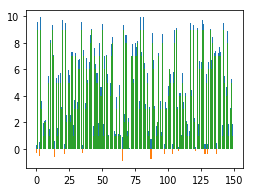

In [22]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
means = numpy.random.randint(0,10,150)
positions = numpy.arange(150)
std =numpy.random.random(150)

plt.bar(positions,means+std)
plt.bar(positions,means-std)
plt.bar(positions, means)
plt.savefig("out.svg")
plt.show()